# **TP03** : Q-learning & SARSA

In [1]:
from traffic_env import TrafficEnvironment


🚦 Initial Traffic Light Simulation 🚦
State Format: [Cars North, Cars South, Cars East, Cars West]
Actions: 0 = Keep Current Light, 1 = Switch Light
Initial state: [2 6 7 3] (NS Green, EW Red)
Step 1:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [0 1 9 3]
  🎯 Reward (Cars Passed): 5
----------------------------------------
Step 2:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 2  2 11  3]
  🎯 Reward (Cars Passed): 1
----------------------------------------
Step 3:
  ➡ Action Taken: 0 (Keep)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [ 1  1 11  5]
  🎯 Reward (Cars Passed): 2
----------------------------------------
Step 4:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: EW Green, NS Red
  🏎 Cars State: [2 2 7 3]
  🎯 Reward (Cars Passed): 4
----------------------------------------
Step 5:
  ➡ Action Taken: 1 (Switch)
  🚥 Light Status: NS Green, EW Red
  🏎 Cars State: [2 1 9 3]
  🎯 Reward (Cars Passed): 4
------------

In [2]:
import matplotlib as plt

In [3]:
env = TrafficEnvironment()

In [4]:
state =env.reset()

In [5]:
for _ in range(10) :
    action =0
    next_state,reward =env.step(action)
    print(f"Etat : {next_state},recompense:{reward}")

Etat : [2 3 3 2],recompense:7
Etat : [1 1 4 4],recompense:5
Etat : [0 2 4 5],recompense:2
Etat : [0 1 5 6],recompense:1
Etat : [1 2 5 6],recompense:1
Etat : [0 0 6 7],recompense:3
Etat : [0 0 8 9],recompense:0
Etat : [1 2 8 9],recompense:0
Etat : [ 2  1  9 11],recompense:3
Etat : [ 0  1 10 12],recompense:3


In [6]:
import numpy as np
q_table = np.zeros((10,10,10,10, 2))


In [7]:
alpha = 0.1  
gamma = 0.99 
epsilon = 1.0  
epsilon_decay = 0.995  
episodes = 100  

In [14]:
# Initialisation de l'environnement et de la Q-table
env = TrafficEnvironment()
nb_etats=10000
nb_actions=2
q_table = np.zeros((nb_etats, nb_actions))

# Fonction pour convertir un état en un indice utilisable dans la Q-table
def get_state_index(state):
    """Transforme l'état en un indice unique si nécessaire."""
    return min(sum(state) // len(state), nb_etats - 1)  # Ex: moyenne des valeurs des voies

def train_q_learning(env,episodes=1000,alpha=0.1,gamma=0.9,epsilon=1.0) :
   
    rewards = []
    for episode in range(episodes): 
        state = env.reset()
        state_index = get_state_index(state)  # Convertir l'état en indice
        total_reward = 0
    
        
        
        for _ in range(100):
            if np.random.rand() < epsilon:
                action = np.random.choice(nb_actions)  # Exploration
            else:
                action = np.argmax(q_table[state_index])  # Exploitation
            
            # Exécuter l'action
            next_state, reward = env.step(action)
            next_state_index = get_state_index(next_state)
    
            # Mise à jour de la Q-Table avec la formule du Q-Learning
            q_table[state_index, action] = q_table[state_index, action] + alpha * (
                reward + gamma * np.max(q_table[next_state_index]) - q_table[state_index, action]
            )
            total_reward += reward
            state_index = next_state_index
            # Passer à l'état suivant
            state_index = next_state_index
    
        # Diminuer epsilon pour réduire l'exploration au fil du temps
        epsilon *= epsilon_decay
        rewards.append(total_reward)
    
    return rewards, q_table
QL_rewards, q_table_QL = train_q_learning(env)
print("Apprentissage terminé ! ")
print("Q-Table finale :")
print(q_table)


Apprentissage terminé ! 
Q-Table finale :
[[28.86218598 30.44278004]
 [30.99679655 32.96956328]
 [31.86671605 34.47186813]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


### **SARSA**

In [12]:
def train_sarsa(env, episodes=1000, alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995):
    q_table_sarsa = np.zeros((nb_etats, nb_actions))
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        state_index = get_state_index(state)
        total_reward = 0
        
        if np.random.rand() < epsilon:
            action = np.random.choice(nb_actions)
        else:
            action = np.argmax(q_table_sarsa[state_index])
        
        for _ in range(100):
            next_state, reward = env.step(action)
            next_state_index = get_state_index(next_state)
            
            if np.random.rand() < epsilon:
                next_action = np.random.choice(nb_actions)
            else:
                next_action = np.argmax(q_table_sarsa[next_state_index])
            
            # Mise à jour de la Q-Table avec la formule de SARSA
            q_table_sarsa[state_index, action] = q_table_sarsa[state_index, action] + alpha * (
                reward + gamma * q_table_sarsa[next_state_index, next_action] - q_table_sarsa[state_index, action]
            )
            
            total_reward += reward
            state_index = next_state_index
            action = next_action
        
        epsilon *= epsilon_decay
        rewards.append(total_reward)
    
    return rewards, q_table_sarsa  # Retourner à la fois les récompenses et la Q-table

sarsa_rewards, q_table_sarsa = train_sarsa(env) 
print("Apprentissage SARSA terminé ! ")
print("Q-Table finale pour SARSA :")
print(q_table_sarsa)

Apprentissage SARSA terminé ! 
Q-Table finale pour SARSA :
[[29.3412465  31.42792931]
 [31.17957379 33.80620459]
 [32.40593595 35.44519019]
 ...
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


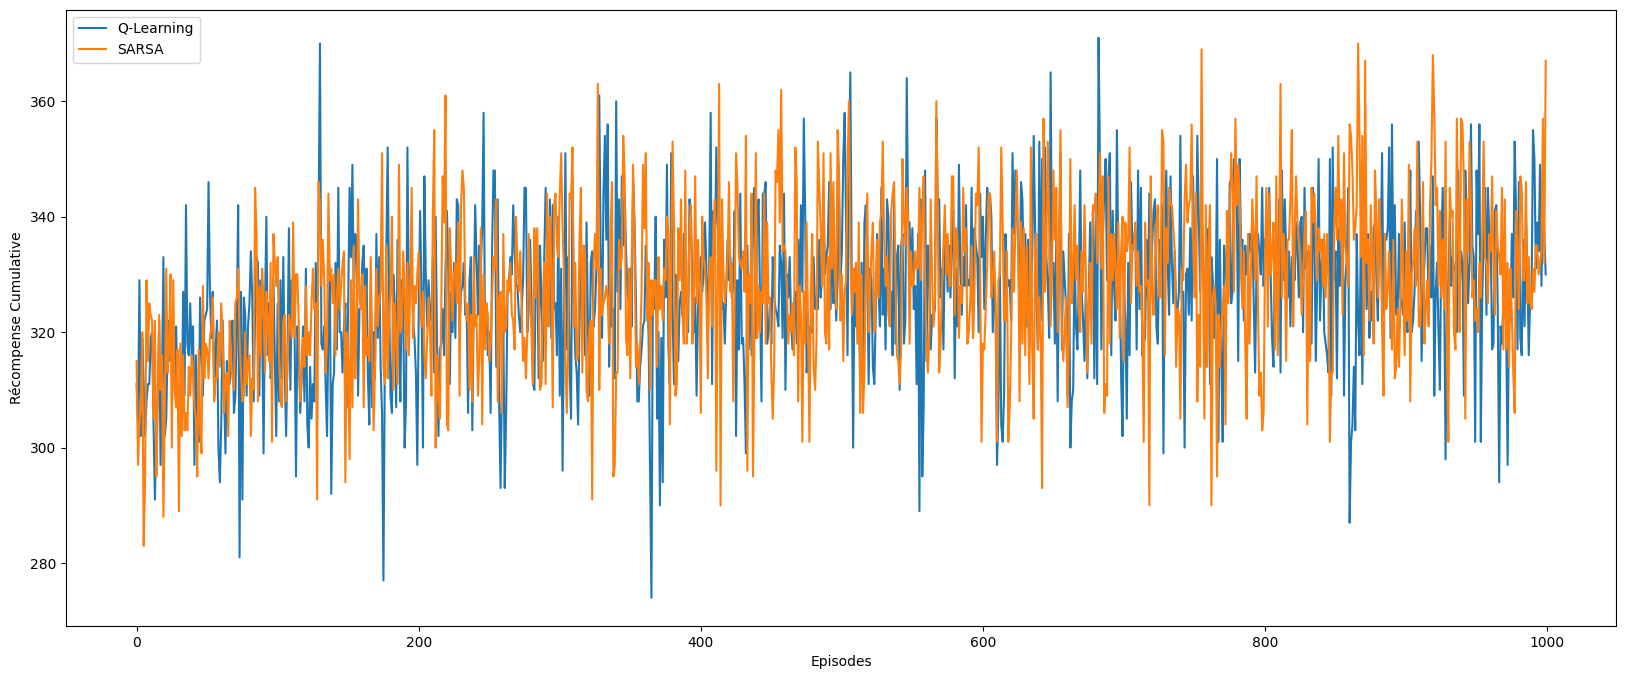

In [18]:
import matplotlib.pyplot as plt  # Correct

plt.figure(figsize=(20,8))
plt.plot(QL_rewards, label="Q-Learning")
plt.plot(sarsa_rewards, label="SARSA")
plt.xlabel("Episodes")
plt.ylabel("Récompense Cumulative")
plt.legend()
plt.show()

